# Tradition vs Digital art on Twitter



I conducted this analysis to compare the interaction of traditional and digital art on twitter. As an artist I was curios to see the difference between the two. Going into this analysis I believed that digital art would get more engagement due to the fact that twitter is a digital platform.

Many artist use twitter as a way to interact with their users but I have not seen anyone talk about what type of art is best displayed on this platform. I am a digital artist and mostly use instagram to engage my audience though some people have told me I should try sharing my art on twitter. 
 
In order to answer my hypothesis I will be focusing on the _public metrics_ dataset from twitter which includes likes, comments, and retweets.

### Hypothesis:
Digital artists recieve more interaction on digital art posts rather than traditional. I predict that digital art recieves 10% more interaction then traditional art on twitter.

### Connecting to the Twitter API

In [1]:
import requests
import pandas as pd
import json
import urllib
import io
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
from scipy import stats

In [2]:
bearer_token = pd.read_csv("twitterApp.txt", header = 0)

In [3]:
token = bearer_token['Bearer Token'].iloc[0]

In [4]:
header = {'Authorization' : 'Bearer {}'.format(token)}

In [5]:
endpoint_url = 'https://api.twitter.com/2/tweets/search/recent'

### Creating Queries

I created two queries to display posts using the hashtags of digital and traditional art to create queries and 2 data sets. By splitting the hashtags I can rate the engage meant in each catagory and compare it. One issue this may cause is overlap between the two types of data so I used the NOT parameter to ensure there was no overlap between the two datasets.

In [6]:
query = urllib.parse.quote('(#digitalart OR #digital #art NOT (#traditionalart OR #traditional)) -is:retweet')
query2 = urllib.parse.quote('(#traditionalart OR #traditional #art NOT (#digitalart OR #digital)) -is:retweet ') 

In [7]:
tweet_fields = 'author_id,id,text,public_metrics,created_at,entities'

In [8]:
url = endpoint_url + '?query={}&tweet.fields={}&user.fields={}&media.fields={}&max_results=100'.format(query,tweet_fields,"username","preview_image_url")
url2 = endpoint_url + '?query={}&tweet.fields={}&user.fields={}&max_results=100'.format(query2,tweet_fields,"username")

In [9]:
digital_1 = requests.request("GET", url, headers=header, stream = True)
traditional_1 = requests.request("GET", url2, headers=header)

In [10]:
digital_dict = json.loads(digital_1.text)
traditional_dict = json.loads(traditional_1.text)

### Creating the first page for 2 Dataframes

In [11]:
digital_page1 = pd.DataFrame(digital_dict['data'])
traditional_page1 = pd.DataFrame(traditional_dict['data'])

In [12]:
digital_metrics1 = pd.DataFrame(list(digital_page1['public_metrics']))
traditional_metrics1 = pd.DataFrame(list(traditional_page1['public_metrics']))

In [13]:
digital_page1['likes'] = digital_metrics1['like_count']
digital_page1['retweets'] = digital_metrics1['retweet_count']
digital_page1['comments'] = digital_metrics1['reply_count']

traditional_page1['likes'] = traditional_metrics1['like_count']
traditional_page1['retweets'] = traditional_metrics1['retweet_count']
traditional_page1['comments'] = traditional_metrics1['reply_count']

del digital_page1['public_metrics']
del traditional_page1['public_metrics']

### Creating pages 2-4 

I created a function to make this process less messy. This function takes an input of a dictionary, and uses that data to create a new "page" of datapoints. This way I can quickly collect 400 points of data from each query.

In [16]:
def next_page(dictionary):
    next_pg = pd.DataFrame(dictionary['data'])
    next_metric = pd.DataFrame(list(next_pg['public_metrics']))
    ##combining the dataframes
    next_pg['likes'] = next_metric['like_count']
    next_pg['retweets'] = next_metric['retweet_count']
    next_pg['comments'] = next_metric['reply_count']
    del next_pg['public_metrics']
    
    return next_pg

In [17]:
digital_token2 = url +'&next_token={}'.format(digital_dict['meta']['next_token'])
digital_2 = requests.request("GET",url = digital_token2, headers=header)
digital_dict2 = json.loads(digital_2.text)

digital_page2 = next_page(digital_dict2)

In [19]:
digital_token3 = url +'&next_token={}'.format(digital_dict2['meta']['next_token'])
digital_3 = requests.request("GET",url = digital_token3, headers=header)
digital_dict3 = json.loads(digital_3.text)

digital_page3 = next_page(digital_dict3)

In [20]:
digital_token4 = url +'&next_token={}'.format(digital_dict3['meta']['next_token'])
digital_4 = requests.request("GET",url = digital_token4, headers=header)
digital_dict4 = json.loads(digital_4.text)

digital_page4 = next_page(digital_dict3)

In [21]:
tradition_token2 = url +'&next_token={}'.format(traditional_dict['meta']['next_token'])
traditional_2 = requests.request("GET",url = tradition_token2, headers=header)
traditional_dict2 = json.loads(traditional_2.text)

traditional_page2 = next_page(traditional_dict2)

In [23]:
tradition_token3 = url +'&next_token={}'.format(traditional_dict2['meta']['next_token'])
traditional_3 = requests.request("GET",url = tradition_token3, headers=header)
traditional_dict3 = json.loads(traditional_3.text)

traditional_page3 = next_page(traditional_dict3)

In [24]:
tradition_token4 = url +'&next_token={}'.format(traditional_dict3['meta']['next_token'])
traditional_4 = requests.request("GET",url = tradition_token4, headers=header)
traditional_dict4 = json.loads(traditional_4.text)

traditional_page4 = next_page(traditional_dict4)

### Combine Into 2 data frames

In [25]:
digital = pd.concat([digital_page1, digital_page2, digital_page3, digital_page4],ignore_index=True, sort=False)
traditional = pd.concat([traditional_page1, traditional_page2, traditional_page3, traditional_page4], ignore_index=True, sort=False)

In [26]:
digital.tail()

,entities,created_at,id,text,author_id,likes,retweets,comments
395,"{'urls': [{'start': 48, 'end': 71, 'url': 'htt...",2021-12-09T03:15:33.000Z,1468781334411759617,We Are Not Soldiers II #DigitalArt #digital vi...,1252498426568327174,0,0,0
396,"{'urls': [{'start': 169, 'end': 192, 'url': 'h...",2021-12-09T03:15:32.000Z,1468781330066329601,@MyTitsArt Super proud to be part of this proj...,1312835244404305920,0,0,0
397,"{'urls': [{'start': 222, 'end': 245, 'url': 'h...",2021-12-09T03:15:31.000Z,1468781326123864066,Her at it again🤮🤮 she is 🔥💯 #NFTs #NFTart #NFT...,1165759727206326274,4,0,0
398,"{'urls': [{'start': 273, 'end': 296, 'url': 'h...",2021-12-09T03:15:14.000Z,1468781256599085056,My latest #digital #painting of @ioangruffudd ...,219171867,2,0,1
399,"{'urls': [{'start': 172, 'end': 195, 'url': 'h...",2021-12-09T03:15:13.000Z,1468781252417179649,@TrippyPunks_ Super proud to be part of this p...,1312835244404305920,0,0,0


In [27]:
traditional.tail()

,entities,created_at,text,id,author_id,likes,retweets,comments
395,"{'mentions': [{'start': 15, 'end': 23, 'userna...",2021-12-08T21:44:16.000Z,commissi0n for @datcats (reddit)💚\n#furry #fur...,1468697965044723712,1154088388426752001,4,2,1
396,"{'mentions': [{'start': 181, 'end': 192, 'user...",2021-12-08T21:44:14.000Z,Check this out SimbaChicks Nft 🔥🔥\njoin our di...,1468697956056502280,1468685639034015746,0,0,0
397,"{'urls': [{'start': 18, 'end': 41, 'url': 'htt...",2021-12-08T21:44:11.000Z,Cappufuckinccino. https://t.co/LiffX0VsII #art...,1468697942349561861,292619181,0,0,0
398,"{'urls': [{'start': 262, 'end': 285, 'url': 'h...",2021-12-08T21:44:09.000Z,Made a bit of progress on my draw this in your...,1468697934405550080,198144736,3,0,0
399,"{'urls': [{'start': 89, 'end': 112, 'url': 'ht...",2021-12-08T21:44:06.000Z,big uncomfortable smile\n-\n#furryoc #original...,1468697922887897099,1282023970498318337,60,18,3


### Charting the Data

Once I had the data collected and organized I created bar charts to have a visual representation of each comparison. The chart on the _top left_ is the comparison of __likes__, the chart on the _top right_ shows the comparison of the __comments__ and the final graph on the _bottom left_ shows the comparison of the __retweets__.

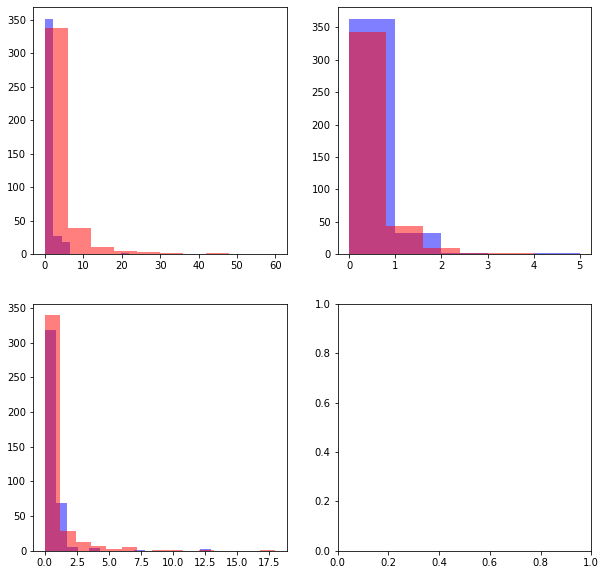

In [28]:
fig0, ax0 = plt.subplots(2, 2, figsize = (10,10))
ax0[0, 0].hist(digital['likes'], bins = 10,color = 'blue',alpha = .5)
ax0[0, 0].hist(traditional['likes'], bins = 10, color = 'red', alpha = .5)

ax0[0, 1].hist(digital['comments'], bins = 5,color = 'blue',alpha = .5)
ax0[0, 1].hist(traditional['comments'], bins = 5, color = 'red', alpha = .5)

ax0[1, 0].hist(digital['retweets'], bins = 15,color = 'blue',alpha = .5)
ax0[1, 0].hist(traditional['retweets'], bins = 15, color = 'red', alpha = .5)
plt.show()

__After reviewing the bar charts I chose to try looking at another type of chart to get a better visual of the difference between the two datasets__

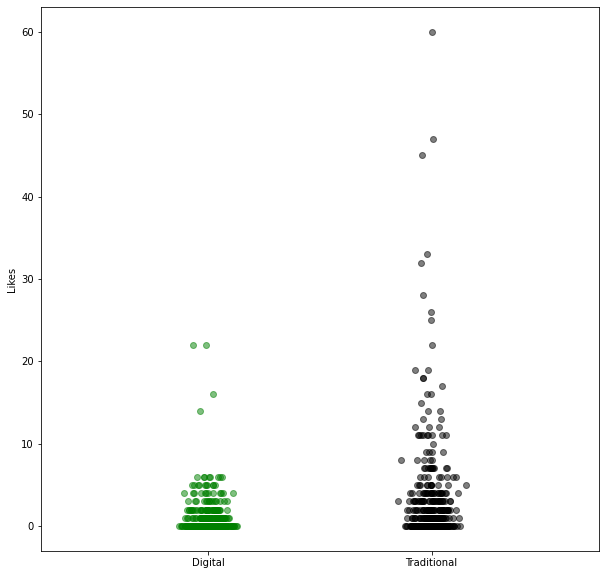

In [29]:
fig2, ax2 =plt.subplots(1,1, figsize = (10,10))

#create a jitter in order to show if any overlap
d_offset = np.random.randn(len(digital.index)) * .002
t_offset = np.random.randn(len(traditional.index)) * .002
d_x = [-.02] * len(digital.index)
t_x = [.02] * len(traditional.index)
d_jitter = d_x + d_offset
t_jitter = t_x + t_offset

ax2.scatter(d_jitter, digital['likes'], color = "g", alpha = .5)
ax2.scatter(t_jitter, traditional['likes'], color = "k", alpha = .5)
ax2.set_xlim(-.05,.05)

ax2.set_xticks([-.02,.02])
ax2.set_xticklabels(['Digital','Traditional'])
ax2.set_ylabel("Likes")

plt.show()

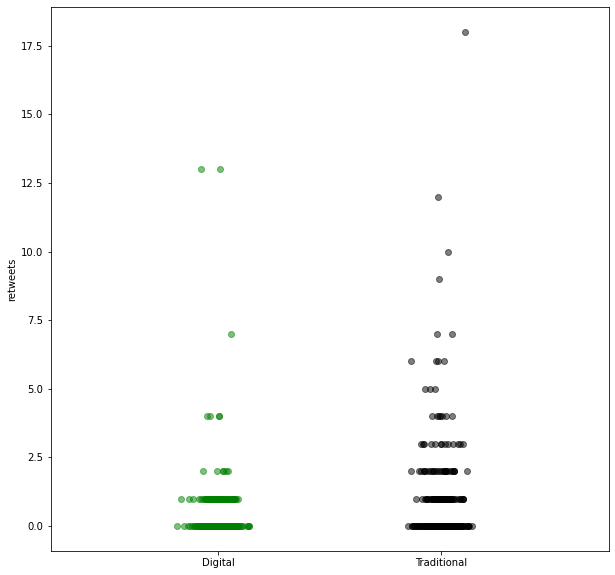

In [30]:
fig4, ax4 =plt.subplots(1,1, figsize = (10,10))

#create a jitter in order to show if any overlap
d_offset = np.random.randn(len(digital.index)) * .002
t_offset = np.random.randn(len(traditional.index)) * .002
d_x = [-.02] * len(digital.index)
t_x = [.02] * len(traditional.index)
d_jitter = d_x + d_offset
t_jitter = t_x + t_offset

ax4.scatter(d_jitter, digital['retweets'], color = "g", alpha = .5)
ax4.scatter(t_jitter, traditional['retweets'], color = "k", alpha = .5)
ax4.set_xlim(-.05,.05)

ax4.set_xticks([-.02,.02])
ax4.set_xticklabels(['Digital','Traditional'])
ax4.set_ylabel("retweets")

plt.show()

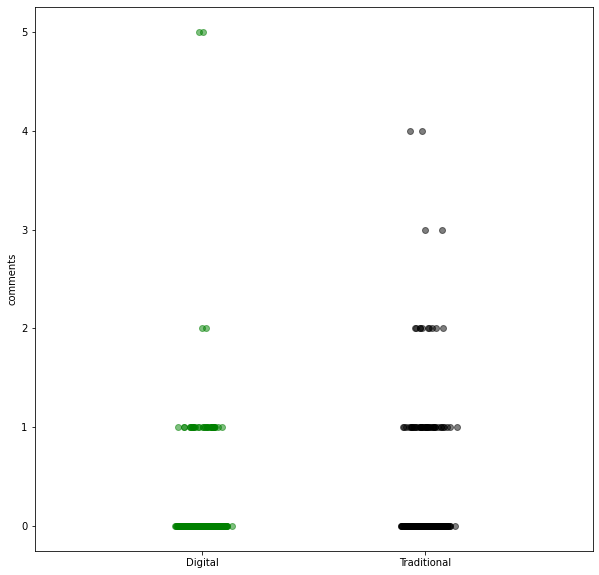

In [31]:
fig5, ax5 =plt.subplots(1,1, figsize = (10,10))

#create a jitter in order to show if any overlap
d_offset = np.random.randn(len(digital.index)) * .002
t_offset = np.random.randn(len(traditional.index)) * .002
d_x = [-.02] * len(digital.index)
t_x = [.02] * len(traditional.index)
d_jitter = d_x + d_offset
t_jitter = t_x + t_offset

ax5.scatter(d_jitter, digital['comments'], color = "g", alpha = .5)
ax5.scatter(t_jitter, traditional['comments'], color = "k", alpha = .5)
ax5.set_xlim(-.05,.05)

ax5.set_xticks([-.02,.02])
ax5.set_xticklabels(['Digital','Traditional'])
ax5.set_ylabel("comments")

plt.show()

### Saving as a CSV

In [35]:
digital.to_csv(r'C:\Users\glori\Data in EMAT\digital.csv')
traditional.to_csv(r'C:\Users\glori\Data in EMAT\traditional.csv')

### Reviewing p-value of the data

From these p-values it seems that the comments and retweets I can reject the null hypothesis. these values are significant. However the pvalue for the likes data seems to suggest that it is not as significant. However when reviewing the charts above I believe it is important to look at all three types of engagements for this analysis.

It is also important to note that the outliers such as the one point with over 60 likes on the first dot plot can change the pvalue.

In [32]:
stats.ttest_ind(digital['likes'],traditional['likes'])

Ttest_indResult(statistic=-6.4292170615685995, pvalue=2.2064201285047585e-10)

In [33]:
stats.ttest_ind(digital['comments'],traditional['comments'])

Ttest_indResult(statistic=-2.0995690800418703, pvalue=0.03608026207692304)

In [34]:
stats.ttest_ind(digital['retweets'],traditional['retweets'])

Ttest_indResult(statistic=-3.693348916970628, pvalue=0.00023640052400642012)

### Conclusion

After completing my analysis I found that my hypothesis was incorrect. I found this surprising and intriguing. Traditional art, at least from the dataset I collected, gets more interactions then digital art on twitter. 

There are a few reasons this may be the case. The biggest variable I can deduce from what I collected is the amount of time between the posts being published and the data being pulled. All the data I pulled was moments after the posts were published. So while the verdict for this data set is that traditional art gets more interaction on twitter, this may change the longer the posts are on the platform. In other words just because the posts get more interaction at first does not mean they get the most interaction over all.

Another thing to consider is the use of hashtags. Although the majority of posts do use hashtags to properly describe their post this is not always the case, I have personally seen posts tagged as "traditional art" that were in fact mixed media, or that had a traditional feel on a digital piece.

Lastly I want to reiterate that this analysis was done with only 400 lines of data per query. This is a major limitation that should not be overlooked. With that being said for the purposes of this analysis we can deduce that traditional art has more of a initial reaction on twitter in comparison the digital art.